# **Parte práctica primer parcial**
-Breiner Farid Amaya Ibagüe

-Johan Andrey Santamaría Ariza

-Nixon Estiven Santos Trillos

#**Introducción**
El análisis de variables relacionadas con el rendimiento académico ha sido un tema central en diferentes investigaciones educativas. A través del uso de modelos de regresión lineal, se puede examinar la relación entre distintos factores, tales como los puntajes en diferentes áreas de conocimiento y variables socioeconómicas, para predecir el rendimiento de los estudiantes del país. En este estudio, la idea principal es analizar como variables los puntajes en lectura crítica, matemáticas, ciencias naturales, inglés y el índice socioeconómico individual del estudiante ("ESTU_INSE_INDIVIDUAL") para observar como se relacionan entre sí y como afectan el rendimiento académico global. Además, se eliminarán los valores no representativos para el estudio, es decir, aquellas personas que obtuvieron 100 puntos en las distintas áreas.

Para llevar a cabo este análisis, se emplearon técnicas de regresión lineal utilizando conjuntos de datos que incluyen dichas variables. Se generaron gráficos de dispersión para visualizar las relaciones entre las variables explicativas y la variable de respuesta, el índice socioeconómico.

Teniendo en cuenta lo anterior, la idea es comparar el estudio elaborado por Yamile Peña Lozano y José John Fredy González Veloza con los datos arrojados obtenidos en el análisis de los mismos; Para ver que tanto influye la capacidad adquisitiva de cada estudiante, en pro de su puntaje en el ICFES. En este contexto, se centra particularmente en el área de matemáticas, dado que el estudio previamente mencionado destaca la relevancia de las variables socioeconómicas en el rendimiento académico en esta materia. A través de este análisis, se pretende identificar patrones y tendencias que nos permitan comprender mejor los factores como el nivel socioeconómico, el acceso a recursos educativos y el apoyo familiar pueden impactar el desempeño en matemáticas.

In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


##**Análisis de datos**
A continuación, se presentan gráficos que ilustran la distribución de ambas variables y su correlación. Los gráficos y los distintos resultados obtenidos tales como los coeficientes de correlación, entre otros, ofrecen una visualización clara de los datos, facilitando la comprensión de los patrones observados.

# **Estadística Multivariada**


*   Gráficos para datos de una variable.
*   Modelo de regresión multilineal.
*   Coeficientes de correlación.
*   Modelo de regresión múltiple.
*   Modelo de red neuronal de perceptrón multicapa.



In [ ]:
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')
datos_icfes.head(4)

<ipython-input-21-5d282fca0cce>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


In [ ]:
datos_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

In [ ]:
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
tabla_nac_med = pd.read_csv(bites, sep= ";", index_col=0, encoding='latin-1')
tabla_nac_med.head(4)

""
ESTU_TIPODOCUMENTOÂ¬ESTU_NACIONALIDADÂ¬ESTU_GENEROÂ¬ESTU_FECHANACIMIENTOÂ¬PERIODOÂ¬ESTU_CONSECUTIVOÂ¬ESTU_ESTUDIANTEÂ¬ESTU_PAIS_RESIDEÂ¬ESTU_DEPTO_RESIDEÂ¬ESTU_COD_RESIDE_DEPTOÂ¬ESTU_MCPIO_RESIDEÂ¬ESTU_COD_RESIDE_MCPIOÂ¬ESTU_PRESENTACIONSABADOÂ¬FAMI_ESTRATOVIVIENDAÂ¬FAMI_PERSONASHOGARÂ¬FAMI_CUARTOSHOGARÂ¬FAMI_EDUCACIONPADREÂ¬FAMI_EDUCACIONMADREÂ¬FAMI_TRABAJOLABORPADREÂ¬FAMI_TRABAJOLABORMADREÂ¬FAMI_TIENEINTERNETÂ¬FAMI_TIENESERVICIOTVÂ¬FAMI_TIENECOMPUTADORÂ¬FAMI_TIENELAVADORAÂ¬FAMI_TIENEHORNOMICROOGASÂ¬FAMI_TIENEAUTOMOVILÂ¬FAMI_TIENEMOTOCICLETAÂ¬FAMI_TIENECONSOLAVIDEOJUEGOSÂ¬FAMI_NUMLIBROSÂ¬FAMI_COMELECHEDERIVADOSÂ¬FAMI_COMECARNEPESCADOHUEVOÂ¬FAMI_COMECEREALFRUTOSLEGUMBREÂ¬FAMI_SITUACIONECONOMICAÂ¬ESTU_DEDICACIONLECTURADIARIAÂ¬ESTU_DEDICACIONINTERNETÂ¬ESTU_HORASSEMANATRABAJAÂ¬ESTU_TIPOREMUNERACIONÂ¬COLE_CODIGO_ICFESÂ¬COLE_COD_DANE_ESTABLECIMIENTOÂ¬COLE_NOMBRE_ESTABLECIMIENTOÂ¬SEED_CODIGOMENÂ¬SEED_NOMBREÂ¬COLE_GENEROÂ¬COLE_NATURALEZAÂ¬COLE_CALENDARIOÂ¬COLE_BILINGUEÂ¬COLE_CARACTERÂ¬COLE_COD_DANE_SEDEÂ¬COLE_NOMBRE_SEDEÂ¬COLE_SEDE_PRINCIPALÂ¬COLE_AREA_UBICACIONÂ¬COLE_JORNADAÂ¬COLE_COD_MCPIO_UBICACIONÂ¬COLE_MCPIO_UBICACIONÂ¬COLE_COD_DEPTO_UBICACIONÂ¬COLE_DEPTO_UBICACIONÂ¬ESTU_PRIVADO_LIBERTADÂ¬ESTU_COD_MCPIO_PRESENTACIONÂ¬ESTU_MCPIO_PRESENTACIONÂ¬ESTU_DEPTO_PRESENTACIONÂ¬ESTU_COD_DEPTO_PRESENTACIONÂ¬PUNT_LECTURA_CRITICAÂ¬PERCENTIL_LECTURA_CRITICAÂ¬DESEMP_LECTURA_CRITICAÂ¬PUNT_MATEMATICASÂ¬PERCENTIL_MATEMATICASÂ¬DESEMP_MATEMATICASÂ¬PUNT_C_NATURALESÂ¬PERCENTIL_C_NATURALESÂ¬DESEMP_C_NATURALESÂ¬PUNT_SOCIALES_CIUDADANASÂ¬PERCENTIL_SOCIALES_CIUDADANASÂ¬DESEMP_SOCIALES_CIUDADANASÂ¬PUNT_INGLESÂ¬PERCENTIL_INGLESÂ¬DESEMP_INGLESÂ¬PUNT_GLOBALÂ¬PERCENTIL_GLOBALÂ¬ESTU_INSE_INDIVIDUALÂ¬ESTU_NSE_INDIVIDUALÂ¬ESTU_NSE_ESTABLECIMIENTOÂ¬PERCENTIL_ESPECIAL_GLOBALÂ¬ESTU_ESTADOINVESTIGACION
"TIÂ¬COLOMBIAÂ¬FÂ¬04/11/2005Â¬20231Â¬SB11202310019049Â¬ESTUDIANTEÂ¬COLOMBIAÂ¬CUNDINAMARCAÂ¬25Â¬CHÃAÂ¬25175Â¬NoÂ¬Estrato 3Â¬5 a 6Â¬CuatroÂ¬EducaciÃ³n profesional completaÂ¬EducaciÃ³n profesional completaÂ¬Es dueÃ±o de un negocio grande, tiene un cargo de nivel directivo o gerencialÂ¬Trabaja en el hogar, no trabaja o estudiaÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬MÃS DE 100 LIBROSÂ¬Todos o casi todos los dÃ­asÂ¬Todos o casi todos los dÃ­asÂ¬Todos o casi todos los dÃ­asÂ¬PeorÂ¬Entre 1 y 2 horasÂ¬Entre 1 y 3 horasÂ¬0Â¬NoÂ¬021485Â¬311001002347Â¬COLEGIO BILINGUE JOSE MAX LEON Â¬118Â¬CUNDINAMARCAÂ¬MIXTOÂ¬NO OFICIALÂ¬BÂ¬NÂ¬ACADÃMICOÂ¬311001002347Â¬COL JOSE MAX LEONÂ¬SÂ¬RURALÂ¬COMPLETAÂ¬25214Â¬COTAÂ¬25Â¬CUNDINAMARCAÂ¬NÂ¬25899Â¬ZIPAQUIRÃÂ¬CUNDINAMARCAÂ¬25Â¬100Â¬100Â¬4Â¬83Â¬100Â¬4Â¬77Â¬99Â¬4Â¬77Â¬97Â¬4Â¬87Â¬94Â¬B+Â¬422Â¬100Â¬67.5328144920732Â¬4Â¬4Â¬100Â¬PUBLICAR"
"TIÂ¬COLOMBIAÂ¬MÂ¬08/04/2007Â¬20231Â¬SB11202310017318Â¬ESTUDIANTEÂ¬COLOMBIAÂ¬VALLEÂ¬76Â¬CALIÂ¬76001Â¬SiÂ¬Estrato 3Â¬1 a 2Â¬TresÂ¬Secundaria (Bachillerato) incompletaÂ¬Primaria completaÂ¬Es agricultor, pesquero o jornaleroÂ¬Es dueÃ±o de un negocio pequeÃ±o (tiene pocos empleados o no tiene, por ejemplo tienda, papelerÃ­a, etcÂ¬SiÂ¬NoÂ¬SiÂ¬SiÂ¬NoÂ¬NoÂ¬NoÂ¬NoÂ¬11 A 25 LIBROSÂ¬1 o 2 veces por semanaÂ¬Todos o casi todos los dÃ­asÂ¬1 o 2 veces por semanaÂ¬IgualÂ¬MÃ¡s de 2 horasÂ¬Entre 30 y 60 minutosÂ¬0Â¬NoÂ¬117978Â¬376001005758Â¬INST. TECN. HERMANO MIGUELÂ¬188Â¬CALIÂ¬MIXTOÂ¬NO OFICIALÂ¬BÂ¬NÂ¬ACADÃMICOÂ¬376001005758Â¬INSTITUTO TECNICO HERMANO MIGUELÂ¬SÂ¬URBANOÂ¬MAÃANAÂ¬76001Â¬CALIÂ¬76Â¬VALLEÂ¬NÂ¬76001Â¬CALIÂ¬VALLEÂ¬76Â¬67Â¬70Â¬4Â¬58Â¬52Â¬3Â¬68Â¬85Â¬3Â¬68Â¬83Â¬3Â¬Â¬Â¬Â¬326Â¬Â¬47.2239721156478Â¬2Â¬3Â¬100Â¬PUBLICAR"
"TIÂ¬COLOMBIAÂ¬FÂ¬26/05/2006Â¬20231Â¬SB11202310030916Â¬ESTUDIANTEÂ¬COLOMBIAÂ¬VALLEÂ¬76Â¬YOTOCOÂ¬76890Â¬NoÂ¬Estrato 3Â¬3 a 4Â¬TresÂ¬EducaciÃ³n profesional completaÂ¬EducaciÃ³n profesional completaÂ¬Trabaja como profesional (por ejemplo mÃ©dico, abogado, ingeniero)Â¬Trabaja como profesional (por ejemplo mÃ©dico, abogado, ingeniero)Â¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬SiÂ¬0 A 10 LIBROSÂ¬Todos o casi todos los dÃ­asÂ¬Todos o casi todos los dÃ­asÂ¬3 a 5 veces por semanaÂ¬IgualÂ¬No leo por entretenimientoÂ¬MÃ¡s de 3 horasÂ¬0Â¬No

In [ ]:
# tabla_regresion
tabla_regresion = datos_icfes[["ESTU_INSE_INDIVIDUAL","PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES"]]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
1,47.223972,67,58,68,68,NaN
2,67.695519,37,42,35,35,NaN
3,41.863163,45,41,41,27,58.0


# Histogramas

<Axes: >

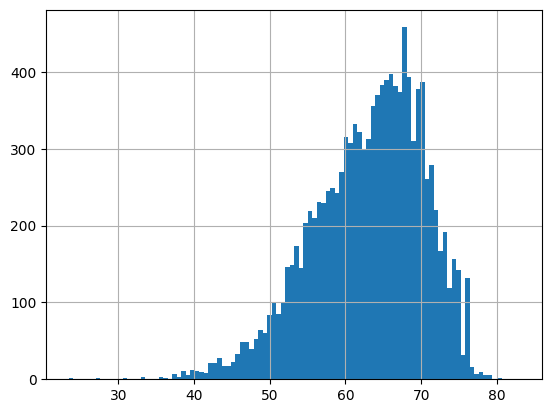

In [ ]:
tabla_regresion["ESTU_INSE_INDIVIDUAL"].hist(bins = 100)

<Axes: >

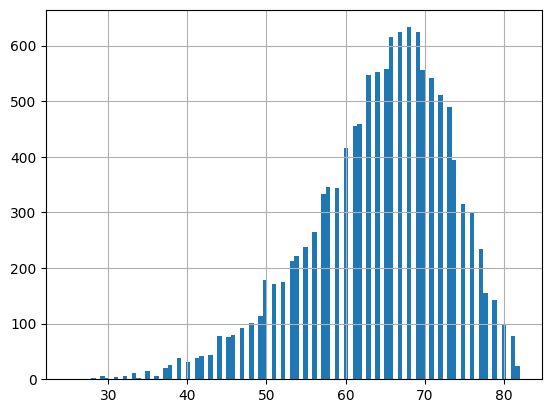

In [ ]:
tabla = tabla_regresion[(tabla_regresion['PUNT_LECTURA_CRITICA'] < 90)]
tabla['PUNT_LECTURA_CRITICA'].hist(bins = 100)

<Axes: >

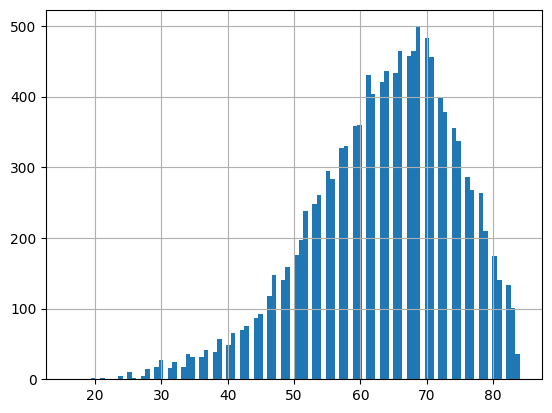

In [ ]:
tabla = tabla_regresion[(tabla_regresion['PUNT_MATEMATICAS'] < 90)]
tabla['PUNT_MATEMATICAS'].hist(bins = 100)


<Axes: >

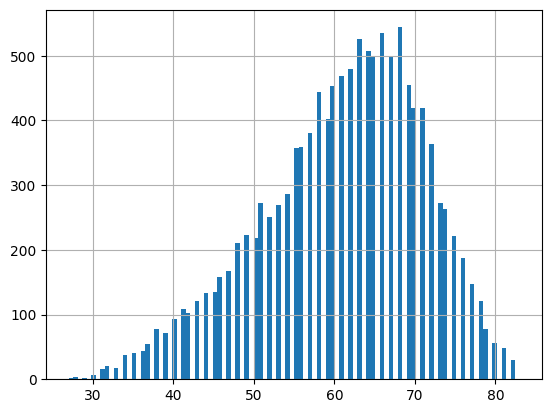

In [ ]:
tabla = tabla_regresion[(tabla_regresion['PUNT_C_NATURALES'] < 90)]
tabla['PUNT_C_NATURALES'].hist(bins = 100)

<Axes: >

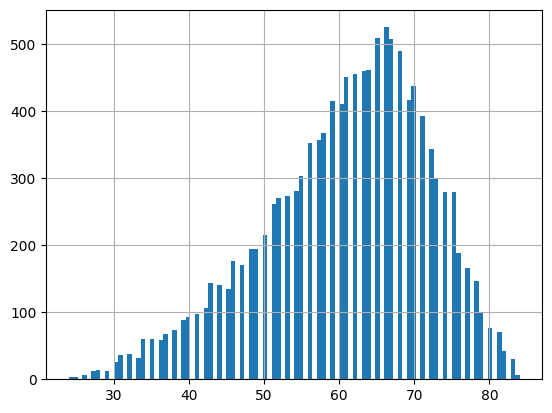

In [ ]:
tabla = tabla_regresion[(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'] < 90)]
tabla['PUNT_SOCIALES_CIUDADANAS'].hist(bins = 100)

<Axes: >

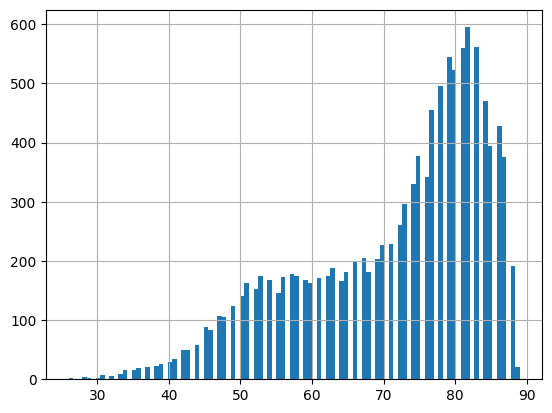

In [ ]:
tabla = tabla_regresion[(tabla_regresion['PUNT_INGLES'] < 90)]
tabla['PUNT_INGLES'].hist(bins = 100)

También podemos ver los elementos en estilo tabla como se muestra a continuación:

In [ ]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["ESTU_INSE_INDIVIDUAL"]< 80) & (tabla_regresion["PUNT_LECTURA_CRITICA"]< 90) & (tabla_regresion["PUNT_MATEMATICAS"]< 90) & (tabla_regresion["PUNT_C_NATURALES"]< 90) &
                                   (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"]< 90) & (tabla_regresion["PUNT_INGLES"]< 100)]

tabla_regresion1.head(5)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


# **Diagramas de dispersión junto a sus rectas de regresión entre la variable respuesta y una a una de las variables explicativas**

In [ ]:
x = np.array(tabla_regresion1["PUNT_LECTURA_CRITICA"]).reshape(-1,1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal0 = regresion0.predict(testx)

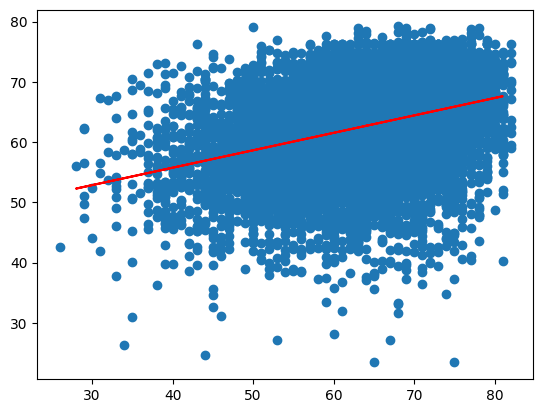

In [ ]:
plt.scatter(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal0, linestyle = '-', color = "red")
plt.show()

 La línea roja representa la recta de regresión calculada con los datos de validación. Esta línea tiene una pendiente ligeramente positiva, lo que indicaría que, a medida que la variable en el eje horizontal aumenta, la variable en el eje vertical también aumenta de manera leve.

Sin embargo, debido a la gran dispersión de los puntos alrededor de la línea, el coeficiente de determinación ($R^2$) es bajo, lo que indica que el modelo lineal no explica bien la variabilidad de los datos. En este caso, la pendiente positiva de la recta es muy leve y no parece representar una relación fuerte entre las variables.

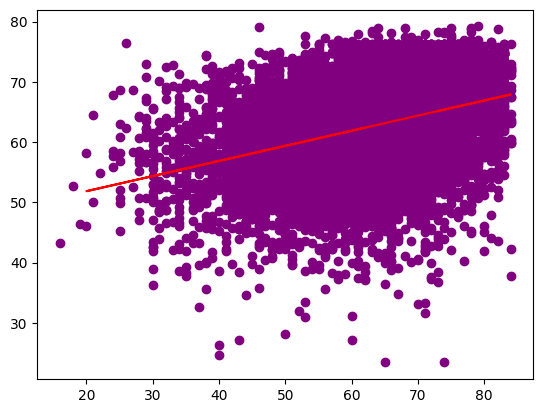

In [ ]:
x0 = np.array(tabla_regresion1["PUNT_MATEMATICAS"]).reshape(-1,1)
y0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train0x, test0x, train0y, test0y = train_test_split(x0, y0, test_size = 0.2, random_state = 0)
modelo_lineal00 = LinearRegression()
regresion00 = modelo_lineal00.fit(train0x, train0y)
pred_lineal00 = regresion00.predict(test0x)

plt.scatter(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c= "purple")
plt.plot(test0x, pred_lineal00, linestyle = '-', color = "red")
plt.show()

La línea roja representa la recta de regresión calculada con los datos de validación. Esta línea tiene una pendiente ligeramente positiva, lo que indicaría que, a medida que la variable en el eje horizontal aumenta, la variable en el eje vertical también aumenta de manera leve.

Sin embargo, debido a la gran dispersión de los puntos alrededor de la línea, el coeficiente de determinación $(R^2)$ es bajo, lo que indica que el modelo lineal no explica bien la variabilidad de los datos. En este caso, la pendiente positiva de la recta es muy leve y no parece representar una relación fuerte entre las variables.




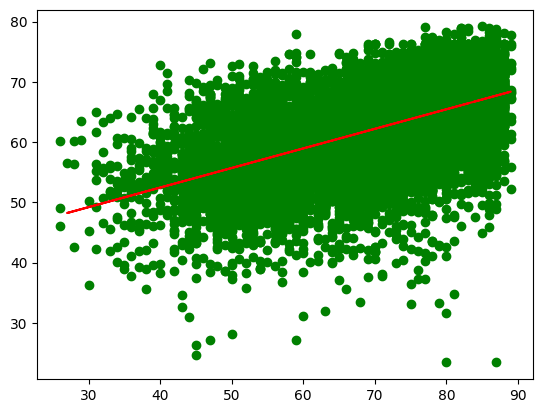

In [ ]:
x1 = np.array(tabla_regresion1["PUNT_INGLES"]).reshape(-1,1)
y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1x, test1x, train1y, test1y = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(train1x, train1y)
pred_lineal01 = regresion01.predict(test1x)

plt.scatter(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c= "green")
plt.plot(test1x, pred_lineal01, linestyle = '-', color = "red")
plt.show()

En general, el comportamiento es similar a los gráficos anteriores: una relación débil que no se explica completamente por una regresión lineal simple. Aunque, parece haber una breve correlación entre las variables.

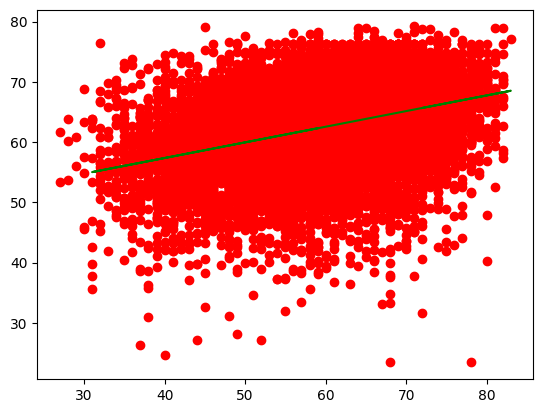

In [ ]:
x2 = np.array(tabla_regresion1["PUNT_C_NATURALES"]).reshape(-1,1)
y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2x, test2x, train2y, test2y = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
modelo_lineal02 = LinearRegression()
regresion02 = modelo_lineal02.fit(train2x, train2y)
pred_lineal02 = regresion02.predict(test2x)

plt.scatter(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c= "red")
plt.plot(test2x, pred_lineal02, linestyle = '-', color = "green")
plt.show()

Note que como en los anteriores diagramas de dispersión, es una nube de puntos sin un patrón en partícular. Y, la recta de regresión, denotada de color verde. Tiene una pendiente positiva.

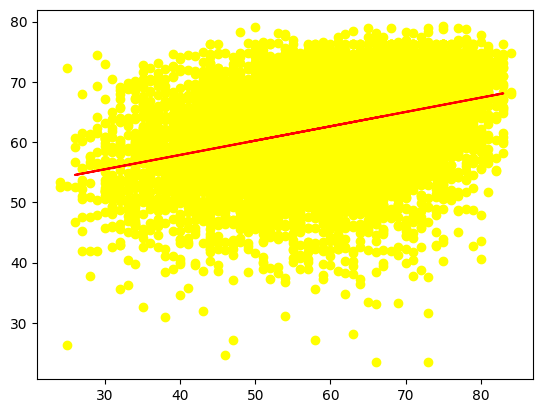

In [ ]:
x3 = np.array(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"]).reshape(-1,1)
y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3x, test3x, train3y, test3y = train_test_split(x3, y3, test_size = 0.2, random_state = 0)
modelo_lineal03 = LinearRegression()
regresion03 = modelo_lineal03.fit(train3x, train3y)
pred_lineal03 = regresion03.predict(test3x)


plt.scatter(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c= "yellow")
plt.plot(test3x, pred_lineal03, linestyle = '-', color = "red")
plt.show()

La línea roja representa la recta de regresión calculada con los datos de validación. Esta línea tiene una pendiente ligeramente positiva, lo que indicaría que, a medida que la variable en el eje horizontal aumenta, la variable en el eje vertical también aumenta de manera leve.

Sin embargo, debido a la gran dispersión de los puntos alrededor de la línea, el coeficiente de determinación ($R^2$) es bajo, lo que indica que el modelo lineal no explica bien la variabilidad de los datos. En este caso, la pendiente positiva de la recta es muy leve y no parece representar una relación fuerte entre las variables.

# **Modelo de regresión lineal múltiple**

Datos de entrenamiento: Son los datos con los cuales se entrena el modelo, es decir, son aquellos datos con los que se estiman los parámetros.

Se tomará un conjunto de datos de entrenamiento del 80%

Datos de validación: Son los datos con los cuales se determina si el modelo implementado tiene un buen ajuste o no.

Se tomará un conjunto de datos de validación del 20%

In [ ]:
X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
12545,46,58,55,42,68.0
10887,69,55,58,63,82.0
6215,54,64,56,50,69.0
5182,68,74,62,59,88.0


Predicciones: Determinar la esperanza dada las variables explicativas = E(ESTU_INSE_INDIVIDUAL| PUNT_LECTURA_CRITICA = k1, PUNT_MATEMATICAS = k2,..., PUNT_INGLES = k5) = a1 k1 + a2 k2 + ... + a5 k5 + b

In [ ]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

Recuerde que el coeficiente de determinación se usa para determinar que tan bueno es nuestro modelo o que tan bien se está ajustando el mismo.

In [ ]:
# Determinar el coeficiente de determinación (para datos de validación)
r2_lineal = regresion.score(testX, testY)
print(r2_lineal)

0.2962348737142402


A continuación se calcula el coeficiente de determinación sin tener en cuenta el "PUNT_MATEMATICAS"

In [ ]:
X1 = tabla_regresion1[["PUNT_LECTURA_CRITICA", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES"]]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
12545,46,58,55,42,68.0
10887,69,55,58,63,82.0
6215,54,64,56,50,69.0
5182,68,74,62,59,88.0


In [ ]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
print(r2_lineal1)

0.29483912553842895


In [ ]:
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
# trainX.head(4)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
pred_lineal2 = regresion2.predict(test2X)
r2_lineal2 = regresion2.score(test2X, test2Y)
print(r2_lineal2)

0.13362998486245803


In [ ]:
X3 = tabla_regresion1[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
# trainX.head(4)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
pred_lineal3 = regresion3.predict(test3X)
r2_lineal3 = regresion3.score(test3X, test3Y)
print(r2_lineal3)

0.2947540211982348


In [ ]:
X4 = tabla_regresion1[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS']]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train4X, test4X, train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)
# trainX.head(4)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(train4X, train4Y)
pred_lineal4 = regresion4.predict(test4X)
r2_lineal4 = regresion4.score(test4X, test4Y)
print(r2_lineal4)

0.2959371782929858


In [ ]:
X5 = tabla_regresion1[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES']]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train5X, test5X, train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)
# trainX.head(4)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X, train5Y)
pred_lineal5 = regresion5.predict(test5X)
r2_lineal5 = regresion5.score(test5X, test5Y)
print(r2_lineal5)

0.2961694957558497


Observe que:

Con "PUNT_MATEMATICAS": 0.2962348737142402, Sin "PUNT_MATEMATICAS": 0.29483912553842895

Con "PUNT_INGLES": 0.2962348737142402,  Sin "PUNT_INGLES": 0.13362998486245803

Con "PUNT_LECTURA_CRITICA": 0.2962348737142402,  Sin "PUNT_LECTURA_CRITICA": 0.2947540211982348

Con "PUNT_C_NATURALES": 0.2962348737142402,  Sin "PUNT_C_NATURALES": 0.2959371782929858


Es claro que se está perdiendo ajuste en nuestro modelo, por lo tanto se puede decir que las variables "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES" y "PUNT_INGLES" SI son variables explicativas.

Sin embargo

Con "PUNT_SOCIALES_CIUDADANAS": 0.2962348737142402,  Sin "PUNT_SOCIALES_CIUDADANAS": 0.2961694957558497

Es decir, "PUNT_SOCIALES_CIUDADANAS" no cambia significativamente nuestro modelo, por tanto "PUNT_SOCIALES_CIUDADANAS" NO es una variable explicativa.






# **Diagrama con el plano de dispersión**

In [ ]:
XY, Z = tabla_regresion1[["PUNT_MATEMATICAS", "PUNT_INGLES"]], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
12545,46,58,55,42,68.0
10887,69,55,58,63,82.0
6215,54,64,56,50,69.0
5182,68,74,62,59,88.0


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) # Entrenamos el modelo

LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)

0.2935166867103943

Debido a que el coeficiente de determinación es 0.2935166867103943 muy cercano a 0.2962348737142402 sin considerar todas las variables explicativas, se puede decir que las variables "PUNT_MATEMATICAS" y "PUNT_INGLES" son importantes como variables explicativas.



In [ ]:
array = modelo1.coef_
array

array([0.020509  , 0.31380449])

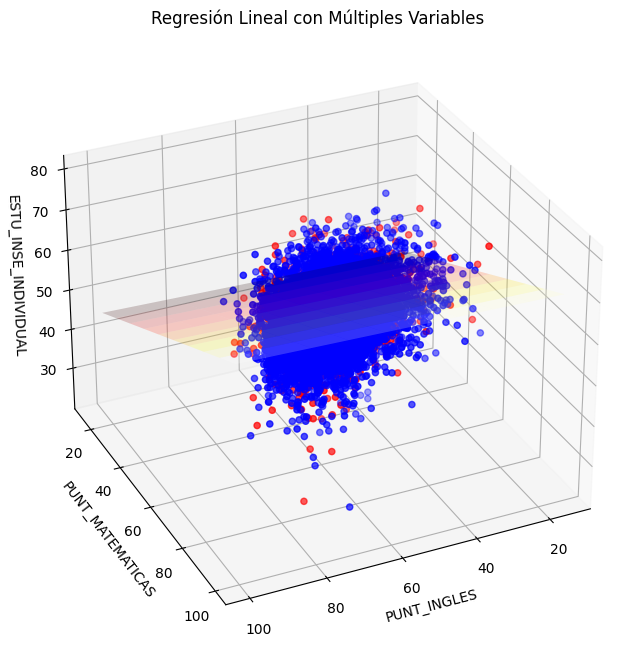

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection = '3d')
xx, yy = np.meshgrid(np.linspace(15,100, num= 10), np.linspace(15, 100, num= 10))
plano_reg = array[0] * xx + array[1] * yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha = 0.2, cmap = "hot")
ax.scatter(trainXY["PUNT_MATEMATICAS"], trainXY["PUNT_INGLES"], trainZ, c = "blue", s=20)
ax.scatter(testXY["PUNT_MATEMATICAS"], testXY["PUNT_INGLES"], testZ, c = "red", s=20)
ax.view_init(elev = 30, azim = 65)

ax.set_xlabel("PUNT_INGLES")
ax.set_ylabel("PUNT_MATEMATICAS")
ax.set_zlabel("ESTU_INSE_INDIVIDUAL")
ax.set_title("Regresión Lineal con Múltiples Variables")
plt.show()

Debido a que para tener un buen coeficiente de determinación este debe ser superior al 80%, entonces se usa un modelo que se pueda ajustar mejor.

# **Modelo de Red Neuronal de Perceptrón Multicapa**


In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100), max_iter=500, activation = 'relu',solver='adam',learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [ ]:
mlp_reg.score(testX, testY)

0.18687926596599225

Es claro que se obtiene un mejor ajuste. Así se puede deducir que al implementar este modelo con muchas más capas se obtendrá un mejor ajuste del mismo.

In [ ]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [ ]:
no_obs = np.array([[45, 40, 60, 50, 60]])
print('Se espera que el estudiante tenga un indice de nivel socioeconomico de ', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ', modelo_lineal.predict(no_obs), 'bajo el modelo de regresión lineal múltiple')

Se espera que el estudiante tenga un indice de nivel socioeconomico de  [61.8530237] bajo el perceptrón multicapa y  [58.80287446] bajo el modelo de regresión lineal múltiple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Coeficientes de correlación de Pearson, de Kendall y de Spearman**

In [ ]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0,1]
pearma_corr, _ = spearmanr(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f'Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearma_corr} y {kendall_corr}')

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.33857044909591394, 0.3373656579865642 y 0.23225254879612614


In [ ]:
pearson_corr1 = np.corrcoef(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0,1]
pearma_corr1, _ = spearmanr(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr1, _ = kendalltau(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f'Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr1}, {pearma_corr1} y {kendall_corr1}')

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3649673865749042, 0.3750105430778031 y 0.25814080098666364


In [ ]:
pearson_corr2 = np.corrcoef(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0,1]
pearma_corr2, _ = spearmanr(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr2, _ = kendalltau(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f'Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr2}, {pearma_corr2} y {kendall_corr2}')

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.34139302056890697, 0.3446226619726169 y 0.23656151273109868


In [ ]:
pearson_corr3 = np.corrcoef(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0,1]
pearma_corr3, _ = spearmanr(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr3, _ = kendalltau(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f'Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr3}, {pearma_corr3} y {kendall_corr3}')

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3393012234371317, 0.3421454732968409 y 0.23503396495844753


In [ ]:
pearson_corr4 = np.corrcoef(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0,1]
pearma_corr4, _ = spearmanr(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr4, _ = kendalltau(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f'Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr4}, {pearma_corr4} y {kendall_corr4}')

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5541479838549712, 0.5642212608622533 y 0.39424810496347445


In [ ]:
tabla_regresion2 = tabla_regresion[(tabla_regresion["ESTU_INSE_INDIVIDUAL"] > 80) & (tabla_regresion["PUNT_LECTURA_CRITICA"]< 90) & (tabla_regresion["PUNT_MATEMATICAS"]< 90) & (tabla_regresion["PUNT_C_NATURALES"]< 90) &
                                   (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"]< 90) & (tabla_regresion["PUNT_INGLES"]< 100)]

tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,83.007321,75,64,71,59,83.0
8910,80.453570,61,68,67,50,78.0
10650,80.453570,68,68,58,66,87.0


## **Conclusiones**



*  Según el artículo sobre el modelo de predicción de los resultados de la prueba ICFES Saber 11 en el área de matemáticas, basado en variables socioeconómicas, se observa que la ubicación de las instituciones educativas tiene un impacto significativo en los resultados. Los colegios ubicados en áreas rurales presentan puntajes más bajos, lo que sugiere que la calidad de la educación en matemáticas que reciben los estudiantes de estas zonas es inferior. Esta conclusión se alinea con los resultados previos en el análisis de datos, donde se evidencia una clara relación entre el puntaje en matemáticas y el índice socioeconómico de los estudiantes.
*   El análisis revela que los estudiantes que asisten a instituciones con mayores recursos educativos, como bibliotecas, tecnología y materiales didácticos, presentan un mejor rendimiento en matemáticas. Esto pone de manifiesto la importancia de invertir en infraestructura y recursos en colegios para mejorar la calidad educativa.
*  Se debe incrementar el índice del nivel sociecónomico, para mejorar el rendimiento académico, tal como lo menciona la revista RPubs. Una buena estrategia, seria creando politicas gubernamentales que ayuden al incremento de dicho indice, de esta manera, la población colombiana accederia a una educación de calidad y esto tendria beneficios en nuestra sociedad.
* En nuestra sociedad colombiana, somos conscientes de la diferencia socioecónomica que hay entre diversos sectores sociales, y tal como lo indica la Universidad de los Andes, el sistema educativo replica y refuerza la segregación al concentrar la oferta de educación de calidad en instituciones privadas las cuales tienen un alto costo, donde solo unos pocos pueden acceder a dicho beneficio, no obstante, toda la población deberia poder acceder a una educación de alta calidad, esto generaría a un largo plazo grandes avances en nuestra sociedad y nuestro país podría estar al nivel de las grandes potencias en educación.



## **Referencias**


*   Peña Lozano, Y., & González Veloza, J. J. F. (2022). Modelo de predicción de los resultados de la prueba ICFES Saber 11 en el área de matemáticas a partir de variables socioeconómicas: Modelo de previsão de resultados de testes ICFES Saber 11 na área de matemática baseado em variáveis socioeconómicas. *Studies in Engineering and Exact Sciences*, 3(1), 52–68. https://doi.org/10.54021/seesv3n1-006
*   Andrés Sebastián. (2024, 1 octubre). Regresión lineal múltiple en Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=9kJIRrbQFlE
*  https://rpubs.com/Foodweb/La-brecha-academica-en-las-pruebas-ICFES
* https://www.uniandes.edu.co/es/noticias/economia-y-negocios/el-camino-hacia-el-acceso-equitativo-en-la-educacion

